# **1. Perkenalan Dataset**


Customer Personality Analysis

**Sumber Dataset**:  
 Kaggle: Customer Personality Analysis by Akash Patel. Akses : https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis


# **2. Import Library**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**


In [2]:
df = pd.read_csv('data/marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
df['Income'] = df['Income'].interpolate(method='linear', limit_direction='forward')
df['Income'].isna().sum()

0

In [6]:
# conver Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


# **4. Exploratory Data Analysis (EDA)**


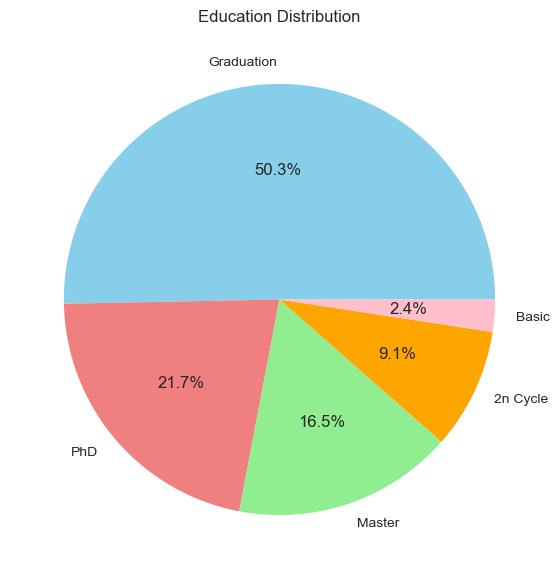

In [7]:
common_colors = colors=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'pink', 'yellow', 'purple']
education = []

for i in range(len(df['Education'].value_counts())):
  education.append(df['Education'].value_counts().index[i])

plt.figure(figsize=(10, 7))
plt.pie(df['Education'].value_counts(), labels=education, autopct='%1.1f%%', colors=common_colors)
plt.title('Education Distribution')
plt.show()

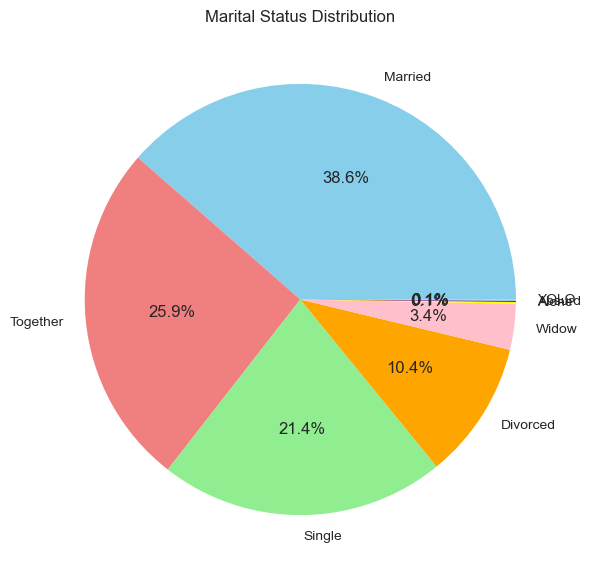

In [8]:
maritial_status = []
for i in range(len(df['Marital_Status'].value_counts())):
    maritial_status.append(df['Marital_Status'].value_counts().index[i])
maritial_status
    
plt.figure(figsize=(10, 7))
plt.pie(df['Marital_Status'].value_counts(), labels=maritial_status, autopct='%1.1f%%', colors=common_colors)
plt.title('Marital Status Distribution')
plt.show()

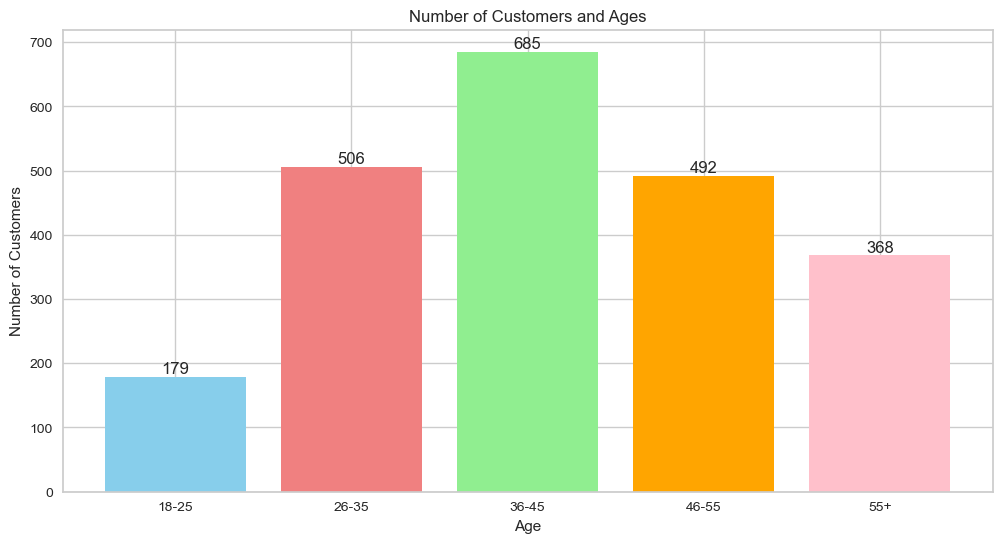

In [9]:
age18_25 = df.Year_Birth[(df.Year_Birth >= 1986) & (df.Year_Birth <= 1993)]
age26_35 = df.Year_Birth[(df.Year_Birth >= 1976) & (df.Year_Birth <= 1985)]
age36_45 = df.Year_Birth[(df.Year_Birth >= 1966) & (df.Year_Birth <= 1975)]
age46_55 = df.Year_Birth[(df.Year_Birth >= 1956) & (df.Year_Birth <= 1965)]
age55above = df.Year_Birth[df.Year_Birth <= 1955]

x = ['18-25', '26-35', '36-45', '46-55', '55+']
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

plt.figure(figsize=(12, 6))
plt.bar(x, y, color=common_colors)
plt.title('Number of Customers and Ages')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')
    
plt.show()

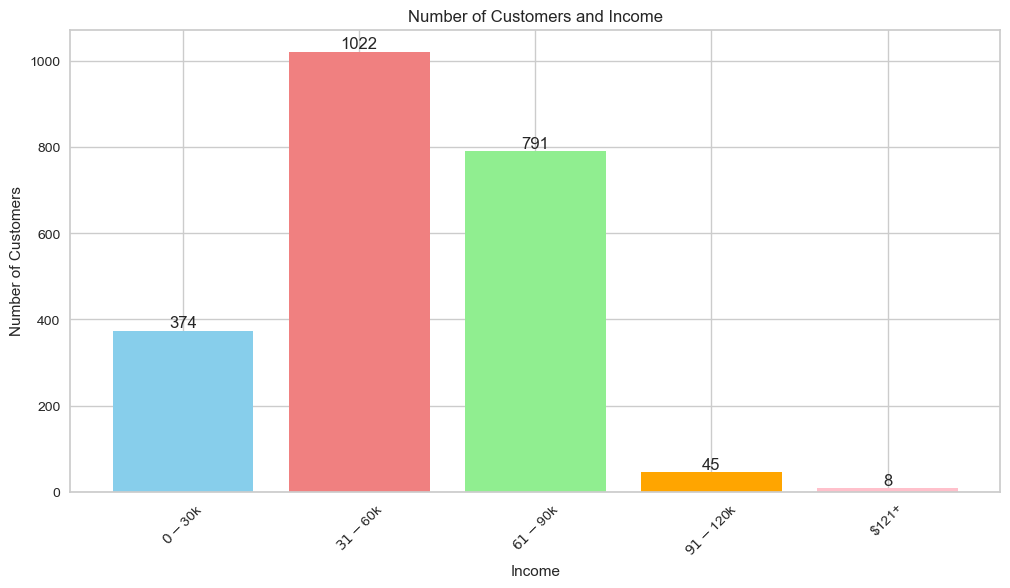

In [10]:
income = df.Income

ai0_30 = income[(income >= 0) & (income <= 30000)]
ai31_60 = income[(income >= 30001) & (income <= 60000)]
ai61_90 = income[(income >= 60001) & (income <= 90000)]
ai91_120 = income[(income >= 90001) & (income <= 120000)]
ai121above = income[(income >= 120001)]

aix = ['$0-$30k', '$31-$60k', '$61-$90k', '$91-$120k', '$121+']
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121above.values)]

plt.figure(figsize=(12, 6))
plt.bar(aix, aiy, color=common_colors)
plt.title('Number of Customers and Income')
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

for i in range(len(aix)):
  plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')

plt.show()

# **5. Data Preprocessing**


In [11]:
df['Age'] = 2024 - df['Year_Birth']
X = df.iloc[:, [29, 4]].values

print(pd.DataFrame(X, columns=['Age', 'Annual Income ($)']))

       Age  Annual Income ($)
0     67.0            58138.0
1     70.0            46344.0
2     59.0            71613.0
3     40.0            26646.0
4     43.0            58293.0
...    ...                ...
2235  57.0            61223.0
2236  78.0            64014.0
2237  43.0            56981.0
2238  68.0            69245.0
2239  70.0            52869.0

[2240 rows x 2 columns]


# **6. Pembangunan Model Clustering**


## **a. Pembangunan Model Clustering**


In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_
k = 4

def anaylze_cluster(X, labels, k):
  print('Analysis of Cluster: ')
  for cluster_id in range(k):
    cluster_data = X[labels == cluster_id]
    
    mean_age = cluster_data[:, 0].mean()
    mean_income = cluster_data[:, 1].mean()
    
    print(f'\nCluster {cluster_id + 1}:')
    print(f'Average Age: {mean_age:.0f}')
    print(f'Average Income: {mean_income:.2f}')
    
anaylze_cluster(X, labels, k)

Analysis of Cluster: 

Cluster 1:
Average Age: 53
Average Income: 34450.28

Cluster 2:
Average Age: 57
Average Income: 69489.24

Cluster 3:
Average Age: 52
Average Income: 158024.29

Cluster 4:
Average Age: 47
Average Income: 666666.00


## **b. Evaluasi Model Clustering**


### **• Elbow Method**


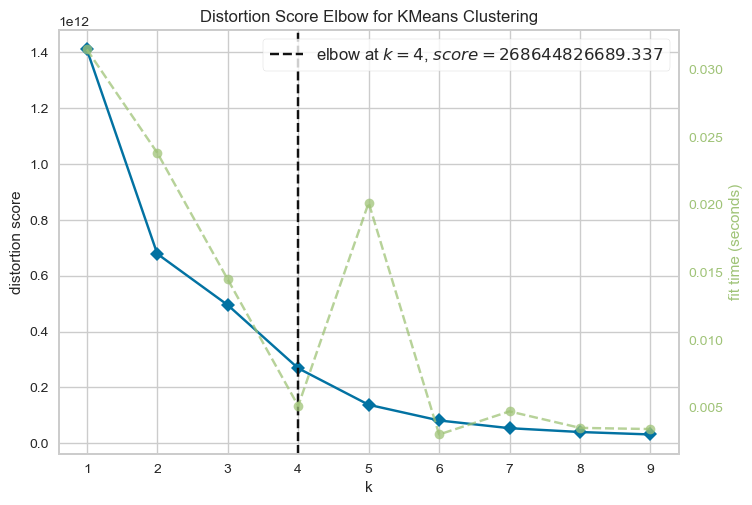

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X)
visualizer.show()

### **• Silhouette Score**


In [14]:
print(f'Silhouette Score: {silhouette_score(X, labels).round(2)}')

Silhouette Score: 0.61


## **c. Visualisasi Hasil Clustering**


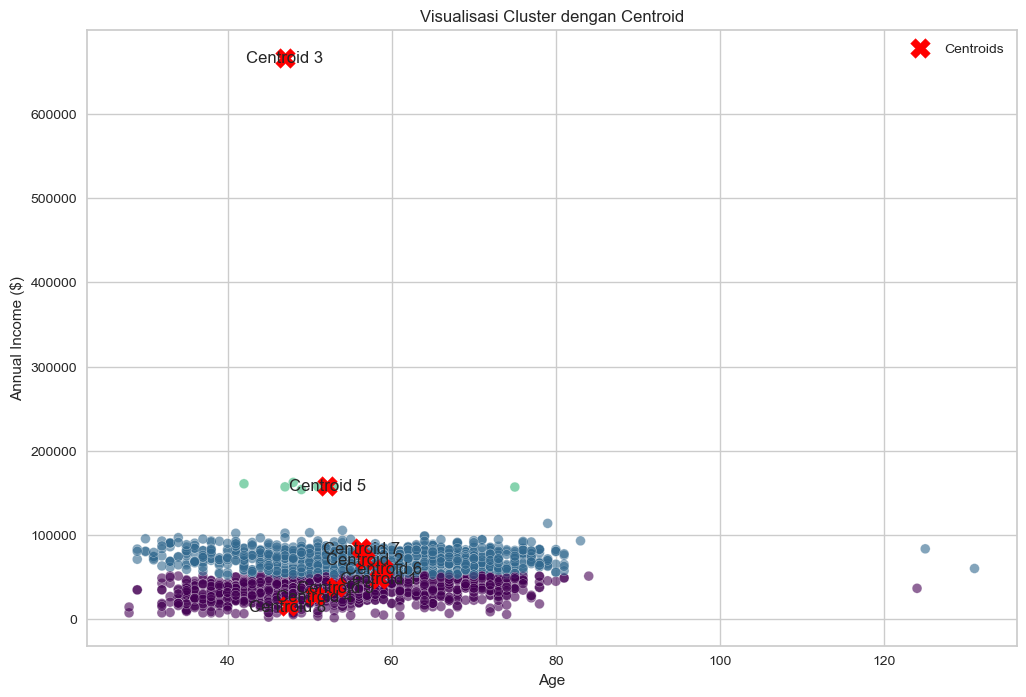

In [15]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

for i, centroids in enumerate(centroids):
  plt.text(centroids[0], centroids[1], f'Centroid {i + 1}', fontsize=12, ha='center', va='center')
  
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Age')
plt.ylabel('Annual Income ($)')
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.

1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?


Berikut hasil analisis karakteristik untuk setiap cluster berdasarkan data rata-rata Age dan Income:

#### **Cluster 1**

- **Rata-rata Age**: 53 tahun
- **Rata-rata Income**: $34,450.28
- **Analisis**:  
  Cluster ini terdiri dari individu yang memiliki usia rata-rata di atas 50 tahun dengan pendapatan tahunan yang relatif rendah. Hal ini mungkin menunjukkan kelompok pekerja senior dengan pekerjaan atau status finansial yang stabil namun sederhana.

---

#### **Cluster 2**

- **Rata-rata Age**: 57 tahun
- **Rata-rata Income**: $69,489.24
- **Analisis**:  
  Cluster ini mencakup individu dengan usia rata-rata tertinggi, yaitu 57 tahun, dan pendapatan tahunan yang lebih tinggi dibandingkan Cluster 1. Individu dalam cluster ini kemungkinan berada dalam posisi keuangan yang lebih baik, yang mungkin mencerminkan tingkat pengalaman profesional yang lebih tinggi atau pensiunan dengan sumber pendapatan tambahan.

---

#### **Cluster 3**

- **Rata-rata Age**: 52 tahun
- **Rata-rata Income**: $158,024.29
- **Analisis**:  
  Cluster ini terdiri dari individu dengan pendapatan tahunan yang sangat tinggi meskipun usia rata-rata sedikit lebih muda dibandingkan Cluster 2. Kelompok ini mungkin mewakili profesional dengan posisi penting atau individu yang sangat sukses dalam karier mereka.

---

#### **Cluster 4**

- **Rata-rata Age**: 47 tahun
- **Rata-rata Income**: $666,666.00
- **Analisis**:  
  Cluster ini mencakup individu dengan usia rata-rata yang paling muda (47 tahun) namun dengan pendapatan yang sangat luar biasa tinggi. Kelompok ini kemungkinan besar adalah eksekutif tingkat atas, pemilik bisnis besar, atau investor dengan penghasilan yang sangat besar.

---


# **7. Mengeksport Data**


In [16]:
df.to_csv('data/marketing_campaign_clean.csv', index=False)
print('Data has been cleaned and exported to marketing_campaign_clean.csv')

Data has been cleaned and exported to marketing_campaign_clean.csv
